In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("E:\\global_terrorism1.csv",encoding="latin1")

In [3]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.size

24528285

df.memory_usage(deep=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
#to see all columns name:
for i in df.columns:
    print(i,end="||")

eventid||iyear||imonth||iday||approxdate||extended||resolution||country||country_txt||region||region_txt||provstate||city||latitude||longitude||specificity||vicinity||location||summary||crit1||crit2||crit3||doubtterr||alternative||alternative_txt||multiple||success||suicide||attacktype1||attacktype1_txt||attacktype2||attacktype2_txt||attacktype3||attacktype3_txt||targtype1||targtype1_txt||targsubtype1||targsubtype1_txt||corp1||target1||natlty1||natlty1_txt||targtype2||targtype2_txt||targsubtype2||targsubtype2_txt||corp2||target2||natlty2||natlty2_txt||targtype3||targtype3_txt||targsubtype3||targsubtype3_txt||corp3||target3||natlty3||natlty3_txt||gname||gsubname||gname2||gsubname2||gname3||gsubname3||motive||guncertain1||guncertain2||guncertain3||individual||nperps||nperpcap||claimed||claimmode||claimmode_txt||claim2||claimmode2||claimmode2_txt||claim3||claimmode3||claimmode3_txt||compclaim||weaptype1||weaptype1_txt||weapsubtype1||weapsubtype1_txt||weaptype2||weaptype2_txt||weapsubtype2

# Cleaning the data

In [10]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location",
       "summary","attacktype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
df= df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"state","City":"city","latitude":"latitude","longitude":"longitude","location":"location","summary":"summary","attacktype1_txt":"attack-type","gname":"Organisation name","motive":"motive","weaptype1_txt":"weapon-type","nkill":"Killed","nwound":"wounded","addnotes":"Addnotes"})

In [12]:
df.head()

,Year,Month,Day,Country,Region,state,city,latitude,longitude,location,summary,attack-type,Organisation name,motive,weapon-type,Killed,wounded,Addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Unknown,NaN,Incendiary,NaN,NaN,NaN


In [13]:
df.tail()

,Year,Month,Day,Country,Region,state,city,latitude,longitude,location,summary,attack-type,Organisation name,motive,weapon-type,Killed,wounded,Addnotes
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Al-Shabaab,NaN,Firearms,1.0,2.0,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Muslim extremists,NaN,Explosives,2.0,7.0,NaN
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,NaN
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Unknown,NaN,Explosives,0.0,0.0,NaN
181690,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,NaN,12/31/2017: An explosive device was discovered...,Bombing/Explosion,Unknown,NaN,Explosives,0.0,0.0,NaN


In [14]:
df.shape

(181691, 18)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               181691 non-null  int64  
 1   Month              181691 non-null  int64  
 2   Day                181691 non-null  int64  
 3   Country            181691 non-null  object 
 4   Region             181691 non-null  object 
 5   state              181270 non-null  object 
 6   city               181256 non-null  object 
 7   latitude           177135 non-null  float64
 8   longitude          177134 non-null  float64
 9   location           55495 non-null   object 
 10  summary            115562 non-null  object 
 11  attack-type        181691 non-null  object 
 12  Organisation name  181691 non-null  object 
 13  motive             50561 non-null   object 
 14  weapon-type        181691 non-null  object 
 15  Killed             171378 non-null  float64
 16  wo

In [16]:
df.isnull().sum()

Year                      0
Month                     0
Day                       0
Country                   0
Region                    0
state                   421
city                    435
latitude               4556
longitude              4557
location             126196
summary               66129
attack-type               0
Organisation name         0
motive               131130
weapon-type               0
Killed                10313
wounded               16311
Addnotes             153402
dtype: int64

# Finding duplicate values

In [17]:
df.duplicated().sum()

12974

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df['Year'].unique()
#here we can see that all the terroist attack took place between 1970 to 2017 in the dataframe.

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [21]:
df["Killed"]=df["Killed"].fillna(0)
df["wounded"]=df["wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["wounded"]


# Observation

In [22]:
print(df["Killed"].max())    #Maximum number of people killed 

1570.0


In [23]:
print(df["wounded"].max())     # Maximum number of people wounded

8191.0


In [24]:
print(df["Casualty"].max())   # maximum number of people casuality 

9574.0


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,168717.0,2003.416407,13.057668,1.970000e+03,1992.000000,2010.000000,2014.000000,2017.000000
Month,168717.0,6.467979,3.392208,0.000000e+00,4.000000,6.000000,9.000000,12.000000
Day,168717.0,15.517541,8.814003,0.000000e+00,8.000000,15.000000,23.000000,31.000000
latitude,164763.0,24.044523,17.940937,-5.315461e+01,12.001013,31.584570,34.621521,74.633553
longitude,164762.0,-492.341878,212328.280925,-8.618590e+07,8.832884,43.780811,69.147011,179.366667
Killed,168717.0,2.417154,11.622966,0.000000e+00,0.000000,0.000000,2.000000,1570.000000
wounded,168717.0,3.084419,35.589201,0.000000e+00,0.000000,0.000000,2.000000,8191.000000
Casualty,168717.0,5.501574,42.052938,0.000000e+00,0.000000,1.000000,4.000000,9574.000000


# Visualization of the data

## Year wise attack details:-

In [146]:
Attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().rename(columns={"count":"Attacks"})


In [148]:
Attacks.head()

,Attacks
Year,
1970,625
1971,451
1972,511
1973,460
1974,536


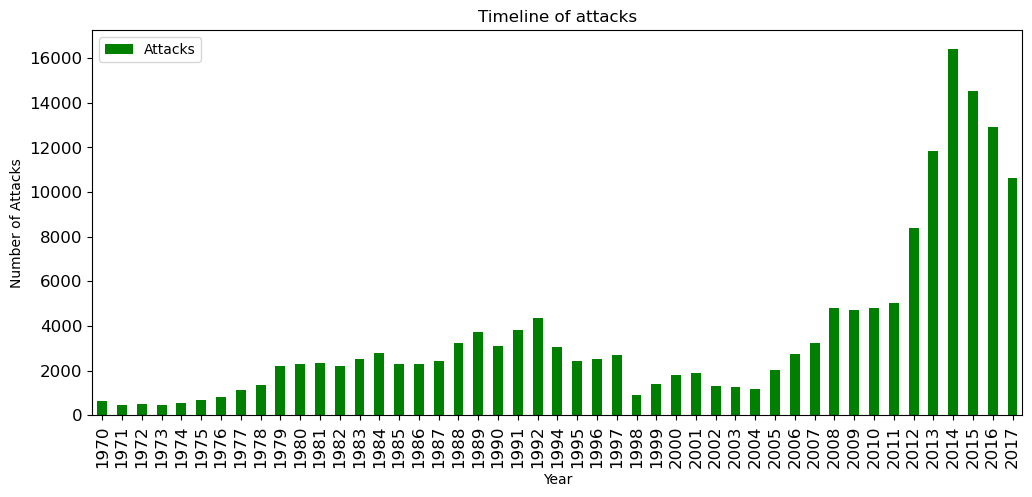

In [28]:
Attacks.plot(kind="bar",color="green",figsize=(12,5),fontsize=12)
plt.title("Timeline of attacks")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

## Year wise casualty:-

In [151]:
total_casualty = df[["Year","Casualty"]].groupby("Year").sum()
total_casualty.head()

,Casualty
Year,
1970,385.0
1971,254.0
1972,959.0
1973,861.0
1974,1400.0


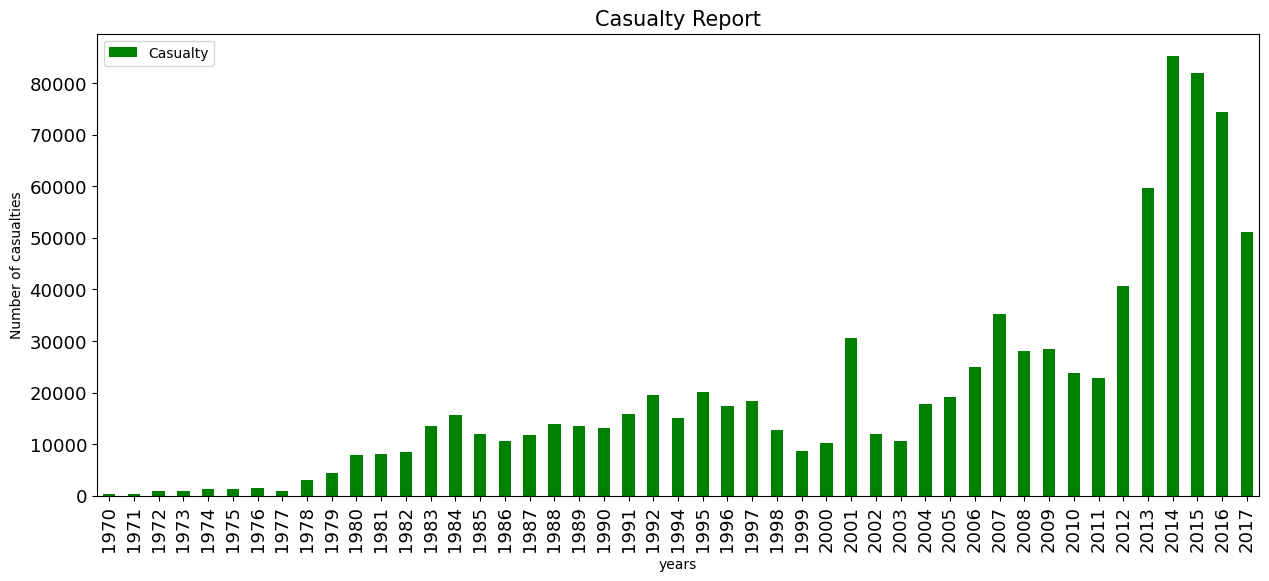

In [30]:
total_casualty.plot(kind="bar",color="green",figsize=(15,6),fontsize=13)
plt.title("Casualty Report",fontsize=15)
plt.xlabel("years")
plt.ylabel("Number of casualties")
plt.show()

In [31]:
total_kill = df[["Year","Killed"]].groupby("Year").sum()
total_kill.head()

,Killed
Year,
1970,173.0
1971,172.0
1972,550.0
1973,366.0
1974,537.0


In [153]:
total_kill.max()

Killed    44356.0
dtype: float64

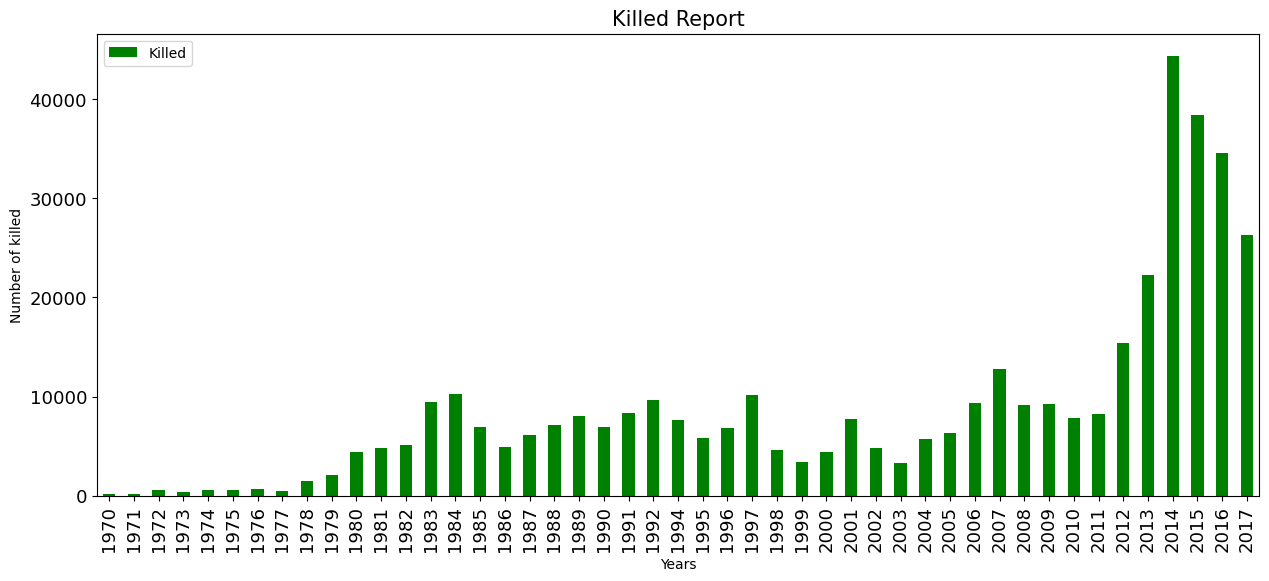

In [32]:
total_kill.plot(kind="bar",color="green",figsize=(15,6),fontsize=13)
plt.title("Killed Report",fontsize=15)
plt.xlabel("Years")
plt.ylabel("Number of killed")
plt.show()

In [33]:
Total_wounded=df[["Year","wounded"]].groupby("Year").sum()
Total_wounded.head()

,wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,863.0


In [154]:
Total_wounded.max()

wounded    43660.0
dtype: float64

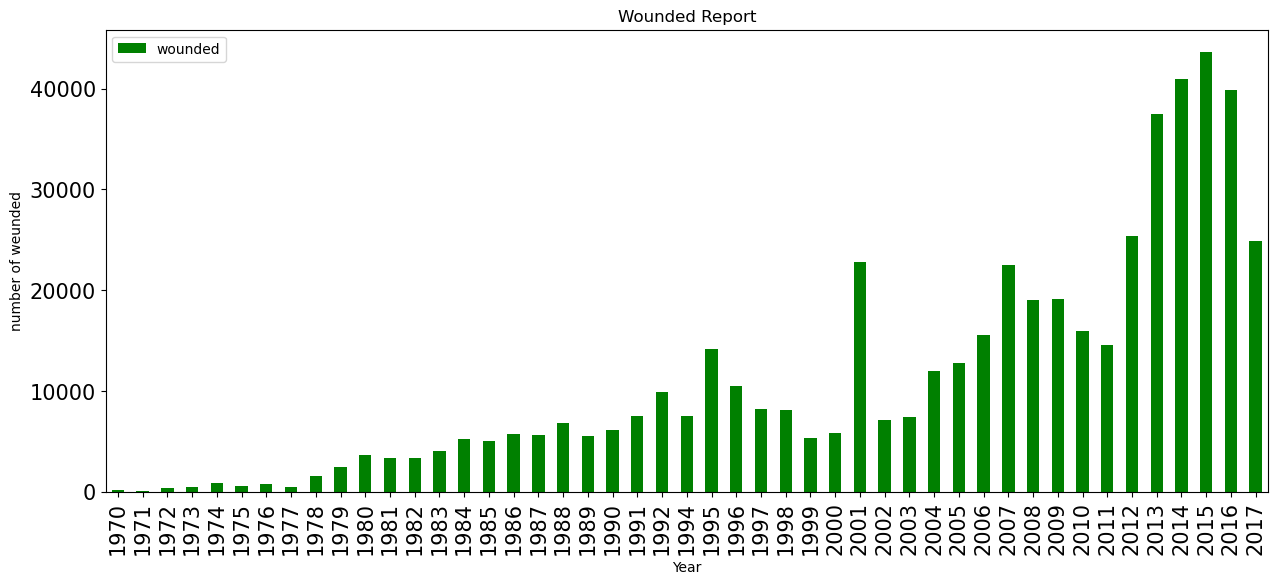

In [34]:
Total_wounded.plot(kind="bar",color="green",figsize=(15,6),fontsize=15)
plt.title("Wounded Report")
plt.xlabel("Year")
plt.ylabel("number of weunded")
plt.show()


## Region wise attacks:-

In [35]:
ct=pd.crosstab(df["Year"],df["Region"])
ct.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,27,455,60,1,10,3,47
1971,1,4,0,1,3,54,235,21,0,6,2,124
1972,5,3,0,0,1,46,72,21,1,12,2,348
1973,1,6,0,2,1,19,63,80,1,2,4,281
1974,1,11,0,4,2,36,105,57,2,3,7,308


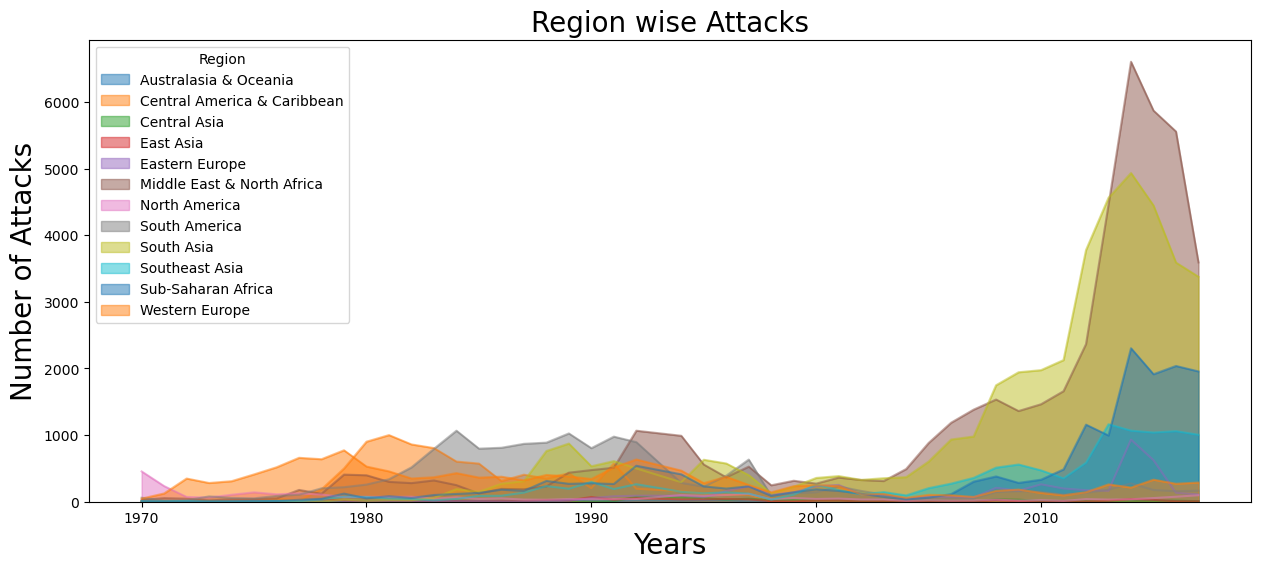

In [36]:
ct.plot(kind="area",stacked=False,alpha=0.5,figsize=(15,6))
plt.title("Region wise Attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [158]:
killed_by_region = df[["Region","Killed"]].groupby("Region").sum()
killed_by_region

,Killed
Region,
Australasia & Oceania,150.0
Central America & Caribbean,28456.0
Central Asia,999.0
East Asia,1137.0
Eastern Europe,7403.0
Middle East & North Africa,136774.0
North America,4830.0
South America,27891.0
South Asia,100284.0


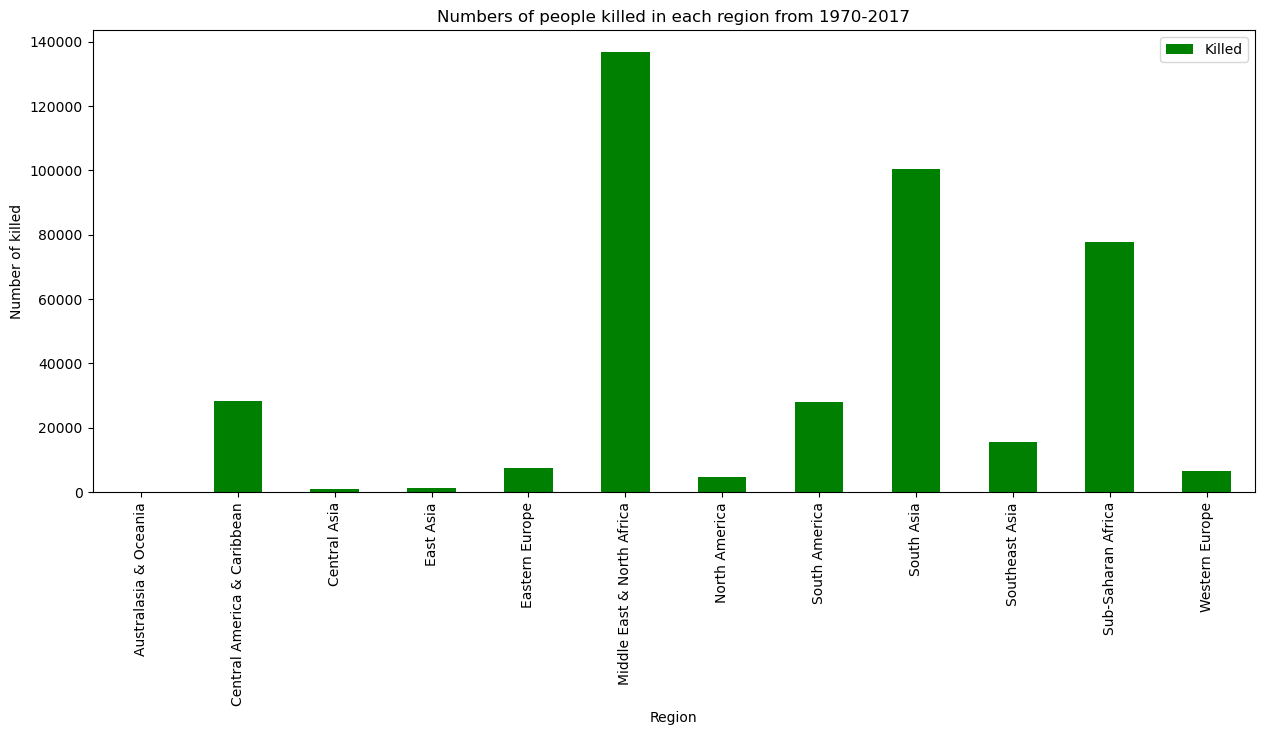

In [159]:
killed_by_region.plot(kind="bar",color="green",figsize=(15,6))
plt.title("Numbers of people killed in each region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of killed")
plt.show()

In [58]:
Casualty_by_region = df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
Casualty_by_region.head()

,Casualty
Region,
Middle East & North Africa,350215.0
South Asia,240389.0
Sub-Saharan Africa,130298.0
South America,44363.0
Southeast Asia,41448.0


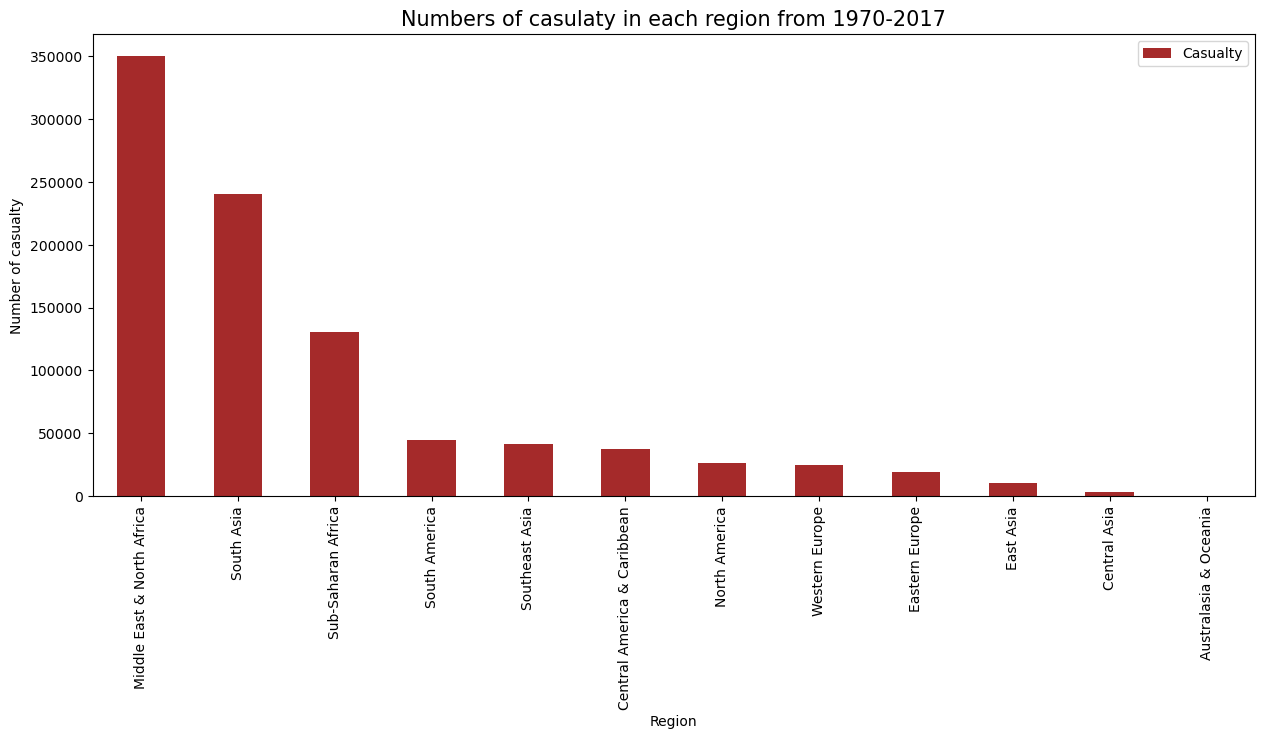

In [63]:
Casualty_by_region.plot(kind="bar",color="brown",figsize=(15,6))
plt.title("Numbers of casulaty in each region from 1970-2017",fontsize=15)
plt.xlabel("Region")
plt.ylabel("Number of casualty")
plt.show()

# Country wise Terrorist Activities

In [73]:
country_killed=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
country_killed.head(10)

,Killed
Country,
Iraq,78371.0
Afghanistan,39149.0
Pakistan,23476.0
Nigeria,22463.0
India,19151.0
Sri Lanka,15276.0
Syria,15044.0
Colombia,14038.0
Peru,12509.0


In [74]:
country_wounded=df[["Country","wounded"]].groupby("Country").sum().sort_values(by="wounded",ascending=False)
country_wounded.head(10)

,wounded
Country,
Iraq,134296.0
Afghanistan,44127.0
Pakistan,41781.0
India,28443.0
United States,20699.0
Sri Lanka,15315.0
Syria,14013.0
Philippines,13168.0
Lebanon,10884.0


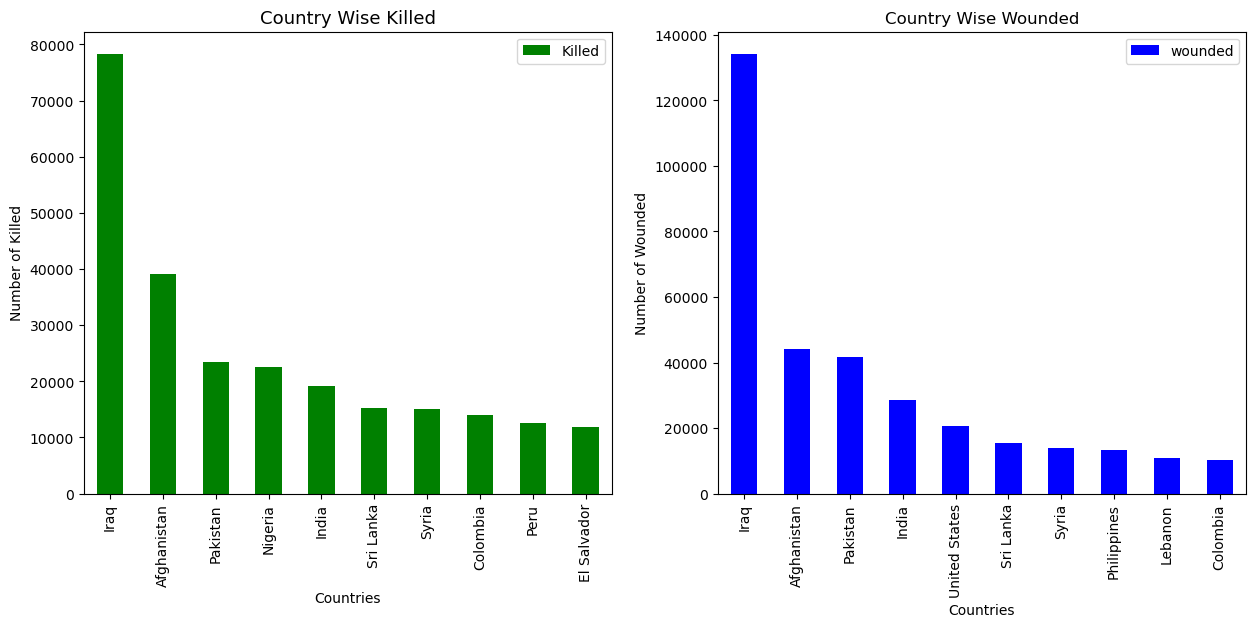

In [98]:
fig = plt.figure()             #Creates a new figure object.
ax0 = fig.add_subplot(1,2,1)   #Adds a subplot to the figure. Here, we're adding the first subplot (1 row, 2 columns) to plot the number of killed.
ax1 = fig.add_subplot(1,2,2)   #Adds the second subplot to plot the number of wounded.

#Killed
country_killed[:10].plot(kind="bar",color="green",figsize=(15,6),ax=ax0)
ax0.set_title("Country Wise Killed",fontsize=13)
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of Killed")

#Wounded
country_wounded[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("Country Wise Wounded")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of Wounded")

plt.show()                     #displays the plot with both subplots showing the number of killed and wounded individuals respectively




# City wise terrorist activities

In [91]:
city_killed=df[["city","Killed"]].groupby("city").sum().sort_values(by="Killed",ascending=False)
city_killed.head(10)

,Killed
city,
Unknown,22306.0
Baghdad,21117.0
Mosul,7123.0
Mogadishu,3908.0
Karachi,3367.0
New York City,2838.0
Tikrit,2672.0
Kabul,2493.0
Ramadi,2307.0


In [92]:
city_wounded=df[["city","Killed"]].groupby("city").sum().sort_values(by="Killed",ascending=False)
city_wounded.head(10)

,Killed
city,
Unknown,22306.0
Baghdad,21117.0
Mosul,7123.0
Mogadishu,3908.0
Karachi,3367.0
New York City,2838.0
Tikrit,2672.0
Kabul,2493.0
Ramadi,2307.0


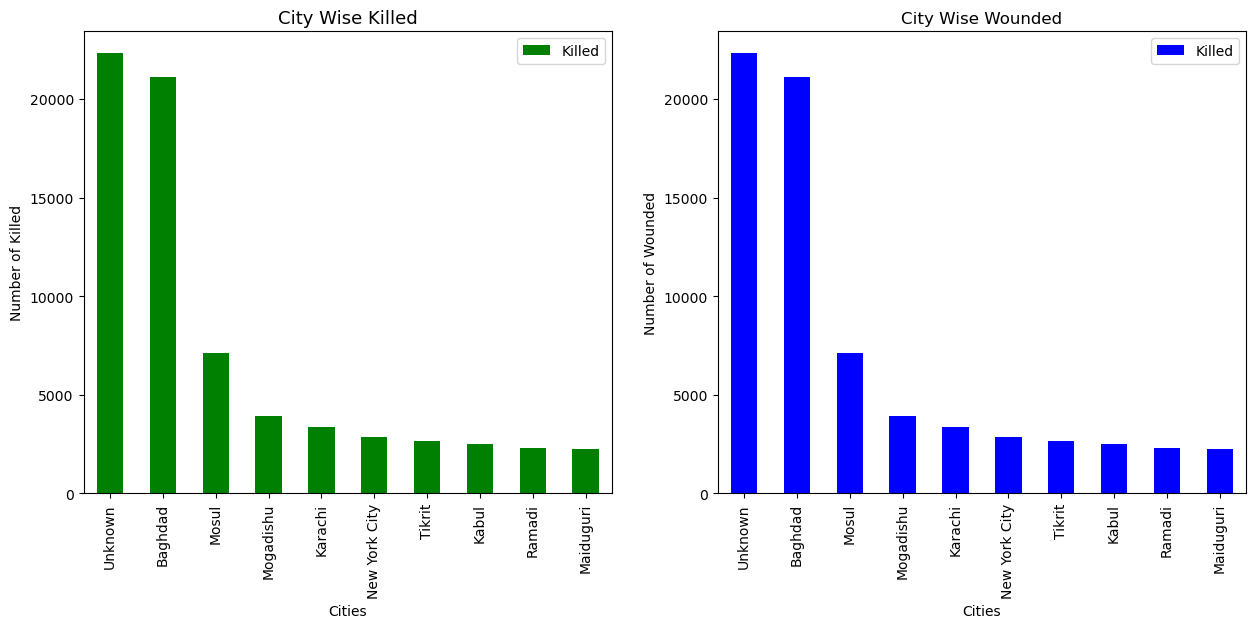

In [97]:
#Here we plot both the graphs
fig = plt.figure()             
ax0 = fig.add_subplot(1,2,1)   
ax1 = fig.add_subplot(1,2,2)   

#Killed
city_killed[:10].plot(kind="bar",color="green",figsize=(15,6),ax=ax0)
ax0.set_title("City Wise Killed",fontsize=13)
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of Killed")

#Wounded
city_wounded[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("City Wise Wounded")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of Wounded")

plt.show()                     




# Attack Types:-

In [112]:
attack_type = df["attack-type"].value_counts()
attack_type

attack-type
Bombing/Explosion                      79631
Armed Assault                          41192
Assassination                          18553
Hostage Taking (Kidnapping)            10912
Facility/Infrastructure Attack          9063
Unknown                                 6870
Unarmed Assault                          930
Hostage Taking (Barricade Incident)      913
Hijacking                                653
Name: count, dtype: int64

Text(0, 0.5, 'Number of attacks')

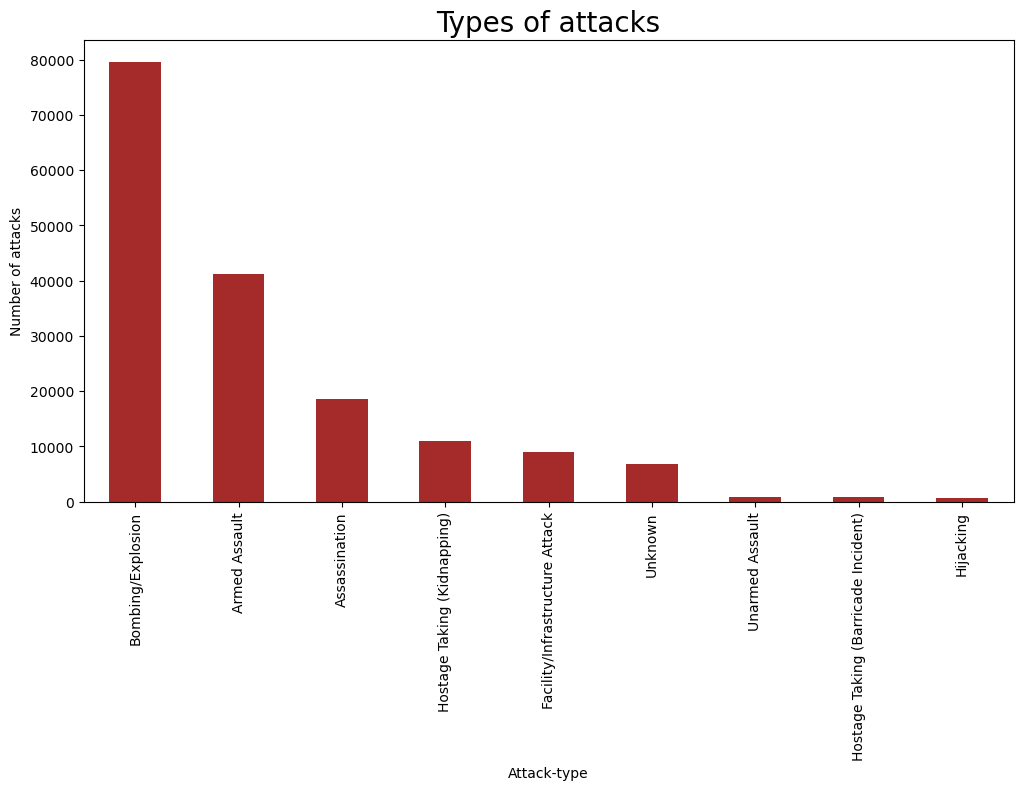

In [126]:
attack_type.plot(kind="bar",color="brown",figsize=(12,6))
plt.title("Types of attacks",fontsize=20)
plt.xlabel("Attack-type")
plt.ylabel("Number of attacks")

In [105]:
killed_type=df[["Killed","attack-type"]].groupby("attack-type").sum().sort_values(by="Killed",ascending=False)
killed_type

,Killed
attack-type,
Armed Assault,158716.0
Bombing/Explosion,156348.0
Unknown,31956.0
Assassination,24154.0
Hostage Taking (Kidnapping),23974.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3591.0
Unarmed Assault,880.0


In [140]:
wounded_type=df[["wounded","attack-type"]].groupby("attack-type").sum().sort_values(by="wounded",ascending=False)
wounded_type

,wounded
attack-type,
Bombing/Explosion,370174.0
Armed Assault,76897.0
Hijacking,17001.0
Unknown,14447.0
Unarmed Assault,14024.0
Assassination,13784.0
Hostage Taking (Kidnapping),6366.0
Hostage Taking (Barricade Incident),3961.0
Facility/Infrastructure Attack,3740.0


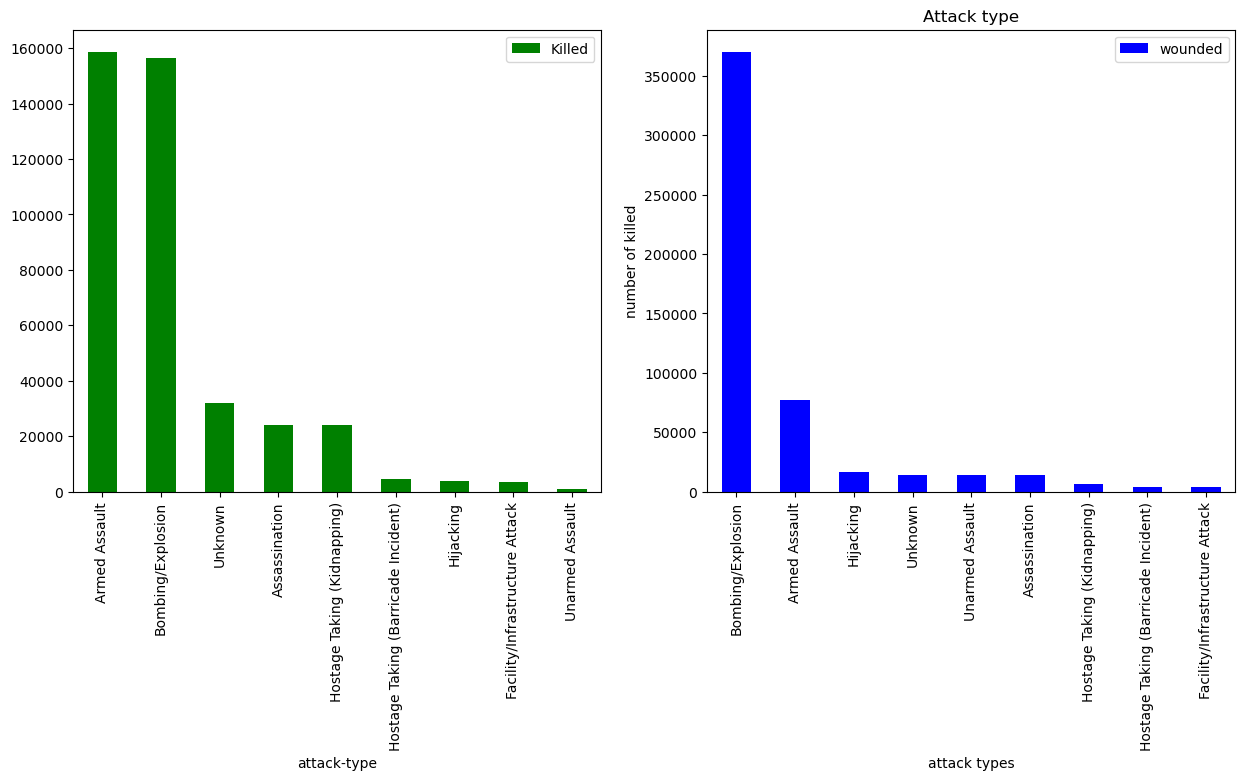

In [144]:
#Here we plot both the graphs
fig = plt.figure()             
ax0 = fig.add_subplot(1,2,1)   
ax1 = fig.add_subplot(1,2,2)   

#wounded
wounded_type[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
plt.title(" Wounded Type")
plt.xlabel("attack types")
plt.ylabel("Number of Wounded")


#killed
killed_type.plot(kind="bar",color="green",figsize=(15,6),ax=ax0)
plt.title("Attack type")
plt.xlabel("attack types")
plt.ylabel("number of killed")
plt.show()

In [132]:
casualty_type=df[["attack-type","Casualty"]].groupby("attack-type").sum().sort_values(by="Casualty",ascending=False)
casualty_type

,Casualty
attack-type,
Bombing/Explosion,526522.0
Armed Assault,235613.0
Unknown,46403.0
Assassination,37938.0
Hostage Taking (Kidnapping),30340.0
Hijacking,20719.0
Unarmed Assault,14904.0
Hostage Taking (Barricade Incident),8439.0
Facility/Infrastructure Attack,7331.0


Text(0, 0.5, 'number of casualty')

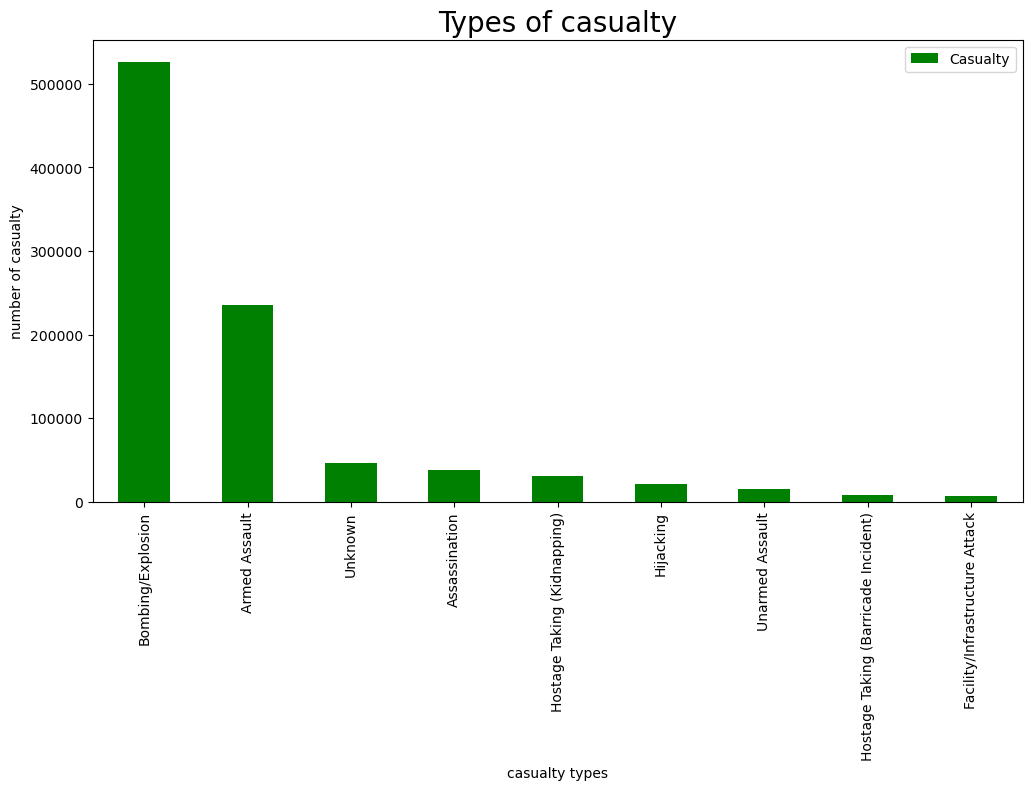

In [139]:
casualty_type.plot(kind="bar",color="green",figsize=(12,6))
plt.title("Types of casualty",fontsize=20)
plt.xlabel("casualty types")
plt.ylabel("number of casualty")             

# Summary

 1. First we imported the data set.Then we cleaned all the missing values and null values in the dataset.

 2. After we fixed the null value we checked how many duplicate values were there in total.  
 3. In the data set, we saw that there were 12974 duplicate values in the data set which we cleaned.
 4. In the data set, we saw that the maximum number of attacks occurred in 2014 which is 16429.
 5. After that, the highest number of casualties occurred in 2017 which was the total number of casualties that was 85313.
 6. Maximum number of people killed in 2014 which was 44356.
 7. Maximum people  wounded in 2014 which was 43660.
 8. We Checked all the region wise attacks, casualties and wounded people from 1970 to 2014.
 9. Then we took out the records of all the terrorist activities that took place in all the country voices and represented them in the bar plot graph.
10. Then we extracted records of all the terrorist activities that took place city wise.
11. Then we checked the types of attacks and found records of how many people were killed, how many casualties, how many people were injured due to         each type of attack.